In [3]:
# Comprehensive EDA - Asthma Disease Dataset
# File: notebooks/exploratory/01_comprehensive_eda.ipynb

# =============================================================================
# IMPORTS AND SETUP
# =============================================================================


import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)


In [4]:
print("📊 ASTHMA DISEASE DATA - EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# =============================================================================
# 1. DATA LOADING AND INITIAL VALIDATION
# =============================================================================

# Load data
df = pd.read_csv('../../data/raw/asthma_disease_data.csv')

print(f"✅ Data loaded successfully!")
print(f"📋 Dataset shape: {df.shape}")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Create a copy for analysis (preserve original)
df_analysis = df.copy()


📊 ASTHMA DISEASE DATA - EXPLORATORY DATA ANALYSIS
✅ Data loaded successfully!
📋 Dataset shape: (2392, 29)
💾 Memory usage: 0.66 MB


In [5]:
# =============================================================================
# 2. DATA STRUCTURE OVERVIEW
# =============================================================================

print("\n" + "="*60)
print("📋 DATA STRUCTURE OVERVIEW")
print("="*60)

# Basic info
print("\n🔍 Dataset Info:")
df.info()

print(f"\n📊 Column Summary:")
print(f"Total columns: {len(df.columns)}")
print(f"Numerical columns: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical columns: {len(df.select_dtypes(include=['object', 'category']).columns)}")

# Display first few rows
print(f"\n👀 First 5 rows:")
display(df.head())

print(f"\n👀 Last 5 rows:")
display(df.tail())


📋 DATA STRUCTURE OVERVIEW

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,0.974339,1,1,0,0,0,0,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,6.584631,0,0,1,0,0,0,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,5.445799,0,1,1,0,1,0,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,3.965316,0,0,0,0,1,0,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,8.260605,0,0,0,0,1,0,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid



👀 Last 5 rows:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,3.425445,1,0,1,0,0,0,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,6.467701,0,0,0,1,0,0,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,9.484013,0,0,0,0,1,0,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,7.712584,5.051405,0,1,1,0,0,1,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid
2391,7425,26,1,0,0,28.123021,1,1.613138,7.412878,8.512253,3.231709,3.874028,5.064317,0,1,0,0,0,0,2.280613,2.453284,1,1,0,0,1,0,0,Dr_Confid


In [6]:
# =============================================================================
# 3. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

if missing_data.sum() == 0:
    print("✅ No missing values detected!")
else:
    missing_df = pd.DataFrame({
        'Missing_Count': missing_data[missing_data > 0],
        'Missing_Percentage': missing_percent[missing_percent > 0]
    }).sort_values('Missing_Percentage', ascending=False)
    
    print("❗ Missing Values Found:")
    display(missing_df)
    
    # Visualize missing data
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

# Duplicate rows check
duplicates = df.duplicated().sum()
print(f"\n🔍 Duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"   Percentage: {(duplicates/len(df))*100:.2f}%")

# Data consistency checks
print(f"\n📊 Data Consistency:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_count = df[col].nunique()
        total_count = len(df[col])
        print(f"  {col}: {unique_count} unique values out of {total_count} total")
        
        # Show unique values if reasonable number
        if unique_count <= 20:
            print(f"    Values: {sorted(df[col].unique())}")


🔍 DATA QUALITY ASSESSMENT
✅ No missing values detected!

🔍 Duplicate rows: 0

📊 Data Consistency:
  DoctorInCharge: 1 unique values out of 2392 total
    Values: ['Dr_Confid']



🎯 TARGET VARIABLE ANALYSIS

📌 Analyzing 'FamilyHistoryAsthma' as potential target:
   Value distribution:
     0: 1672 (69.9%)
     1: 720 (30.1%)


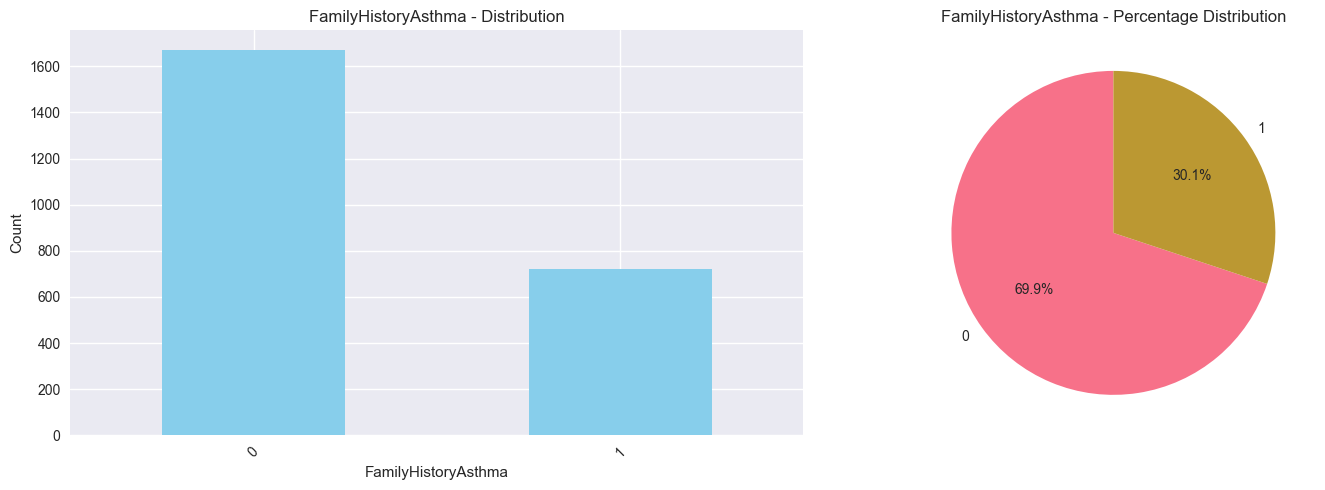


📌 Analyzing 'Diagnosis' as potential target:
   Value distribution:
     0: 2268 (94.8%)
     1: 124 (5.2%)


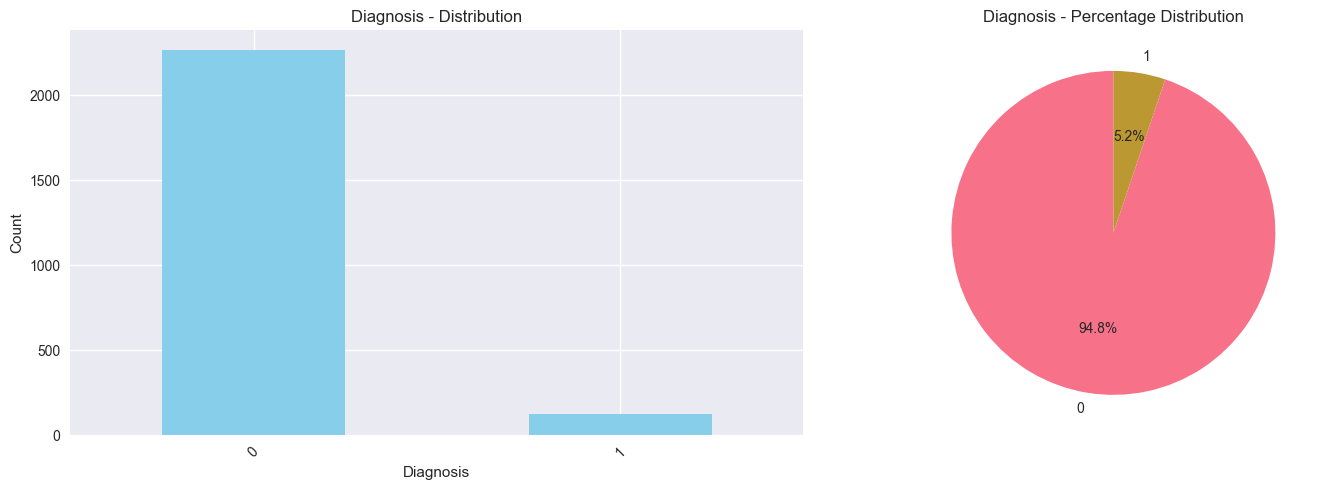

In [7]:
# =============================================================================
# 4. TARGET VARIABLE IDENTIFICATION AND ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("🎯 TARGET VARIABLE ANALYSIS")
print("="*60)

# Find potential target variables
target_candidates = []
for col in df.columns:
    col_lower = col.lower()
    # Look for diagnosis, asthma, target, class, etc.
    if any(keyword in col_lower for keyword in ['diagnosis', 'asthma', 'target', 'label', 'class']):
        target_candidates.append(col)

# If no obvious target, look for binary or low-cardinality columns
if not target_candidates:
    print("🔍 No obvious target variable found. Checking low-cardinality columns:")
    for col in df.columns:
        unique_count = df[col].nunique()
        if 2 <= unique_count <= 10:
            target_candidates.append(col)
            print(f"  Potential target: {col} ({unique_count} unique values)")

# Analyze each target candidate
for target_col in target_candidates[:3]:  # Limit to first 3 candidates
    print(f"\n📌 Analyzing '{target_col}' as potential target:")
    
    # Value counts
    value_counts = df[target_col].value_counts()
    print(f"   Value distribution:")
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"     {val}: {count} ({percentage:.1f}%)")
    
    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    value_counts.plot(kind='bar', ax=ax1, color='skyblue')
    ax1.set_title(f'{target_col} - Distribution')
    ax1.set_ylabel('Count')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    # Pie chart
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'{target_col} - Percentage Distribution')
    
    plt.tight_layout()
    plt.show()


📊 NUMERICAL VARIABLES ANALYSIS
Numerical columns (28): ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'PollutionExposure', 'PollenExposure', 'DustExposure', 'PetAllergy', 'FamilyHistoryAsthma', 'HistoryOfAllergies', 'Eczema', 'HayFever', 'GastroesophagealReflux', 'LungFunctionFEV1', 'LungFunctionFVC', 'Wheezing', 'ShortnessOfBreath', 'ChestTightness', 'Coughing', 'NighttimeSymptoms', 'ExerciseInduced', 'Diagnosis']

📈 Descriptive Statistics:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.000,2392.0,2392.000,2392.000,2392.000,2392.000,2392.000
mean,6229.500,42.138,0.493,0.670,1.307,27.245,0.142,5.052,5.023,7.019,5.013,5.114,4.982,0.166,0.301,0.399,0.192,0.253,0.158,2.549,3.741,0.596,0.5,0.503,0.503,0.602,0.605,0.052
std,690.655,21.607,0.500,0.986,0.898,7.202,0.349,2.904,2.910,1.732,2.936,2.893,2.859,0.372,0.459,0.490,0.394,0.435,0.365,0.862,1.304,0.491,0.5,0.500,0.500,0.489,0.489,0.222
min,5034.000,5.000,0.000,0.000,0.000,15.032,0.000,0.002,0.003,4.001,0.001,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.500,0.000,0.0,0.000,0.000,0.000,0.000,0.000
25%,5631.750,23.000,0.000,0.000,1.000,20.968,0.000,2.578,2.432,5.499,2.433,2.600,2.467,0.000,0.000,0.000,0.000,0.000,0.000,1.824,2.607,0.000,0.0,0.000,0.000,0.000,0.000,0.000
50%,6229.500,42.000,0.000,0.000,1.000,27.052,0.000,5.017,5.115,6.976,5.037,5.098,4.903,0.000,0.000,0.000,0.000,0.000,0.000,2.553,3.735,1.000,1.0,1.000,1.000,1.000,1.000,0.000
75%,6827.250,61.000,1.000,1.000,2.000,33.556,0.000,7.540,7.544,8.527,7.630,7.709,7.432,0.000,1.000,1.000,0.000,1.000,0.000,3.293,4.864,1.000,1.0,1.000,1.000,1.000,1.000,0.000
max,7425.000,79.000,1.000,3.000,3.000,39.986,1.000,9.996,10.000,9.996,9.999,10.000,10.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000,5.999,1.000,1.0,1.000,1.000,1.000,1.000,1.000


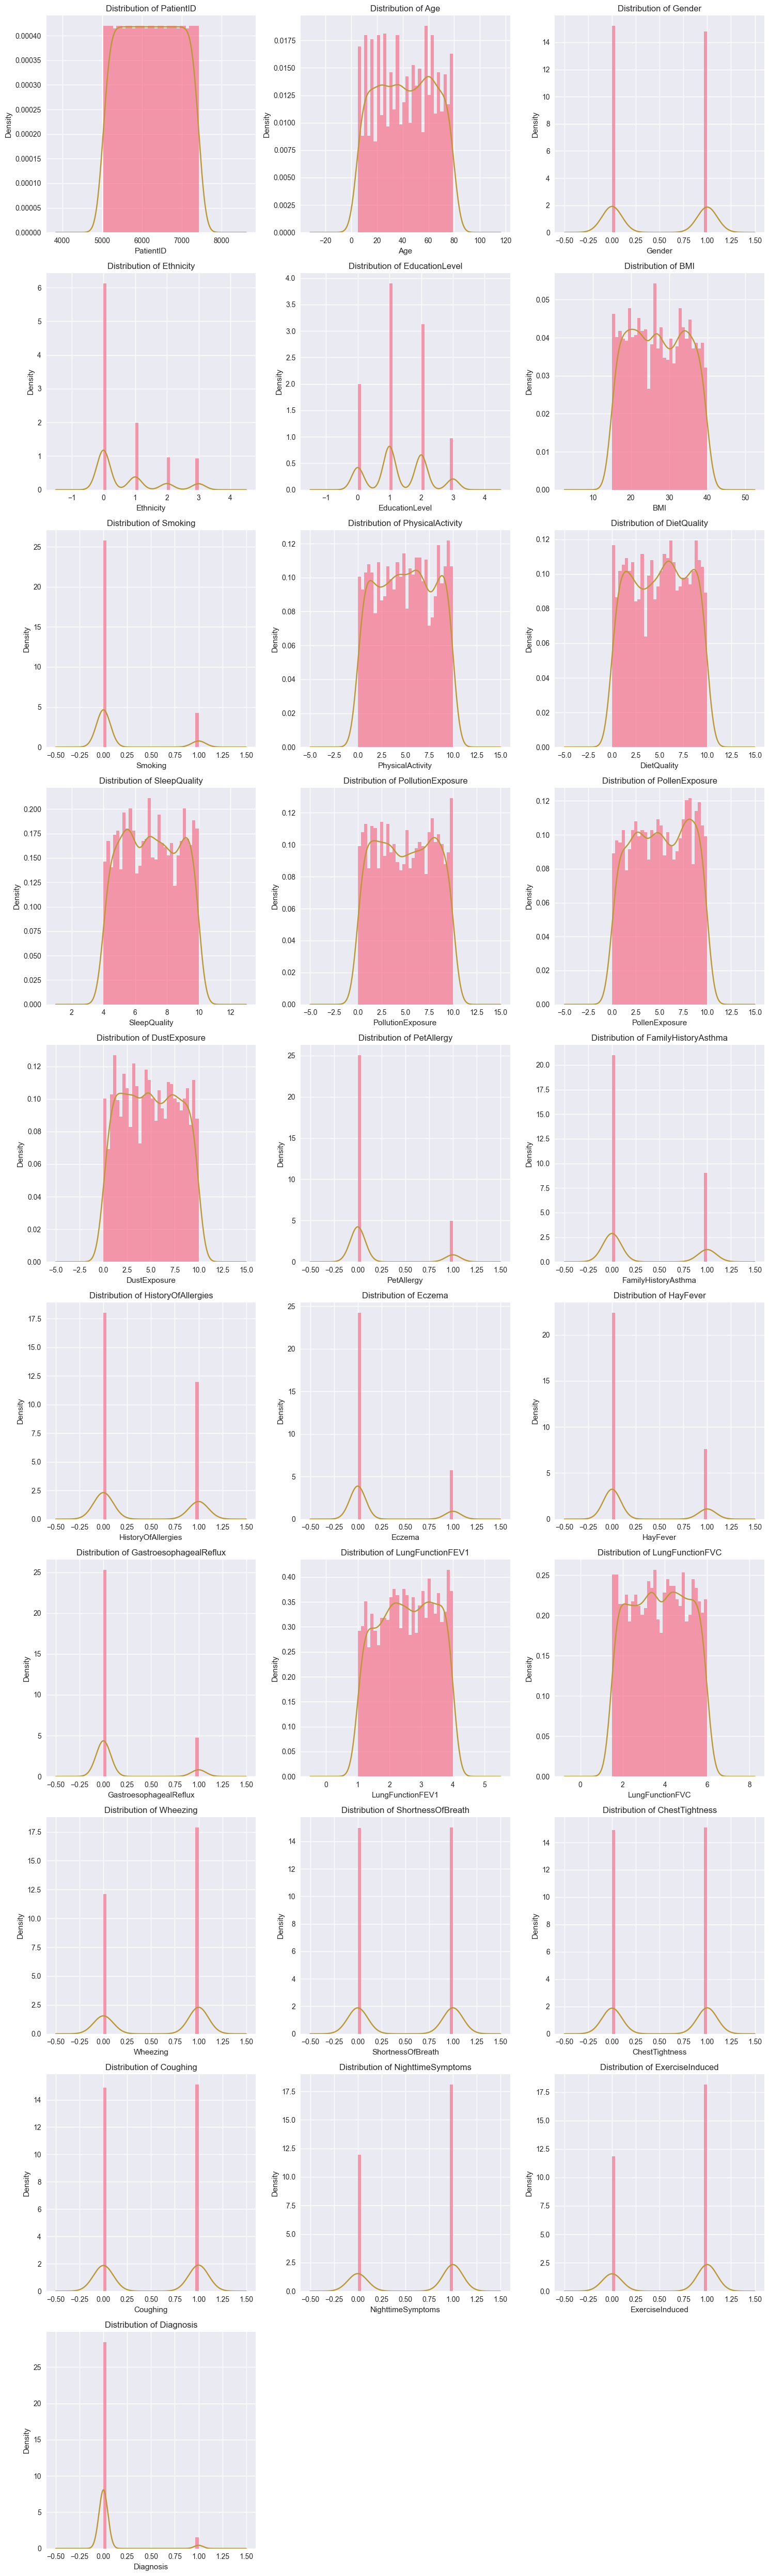


🔗 Correlation Matrix:


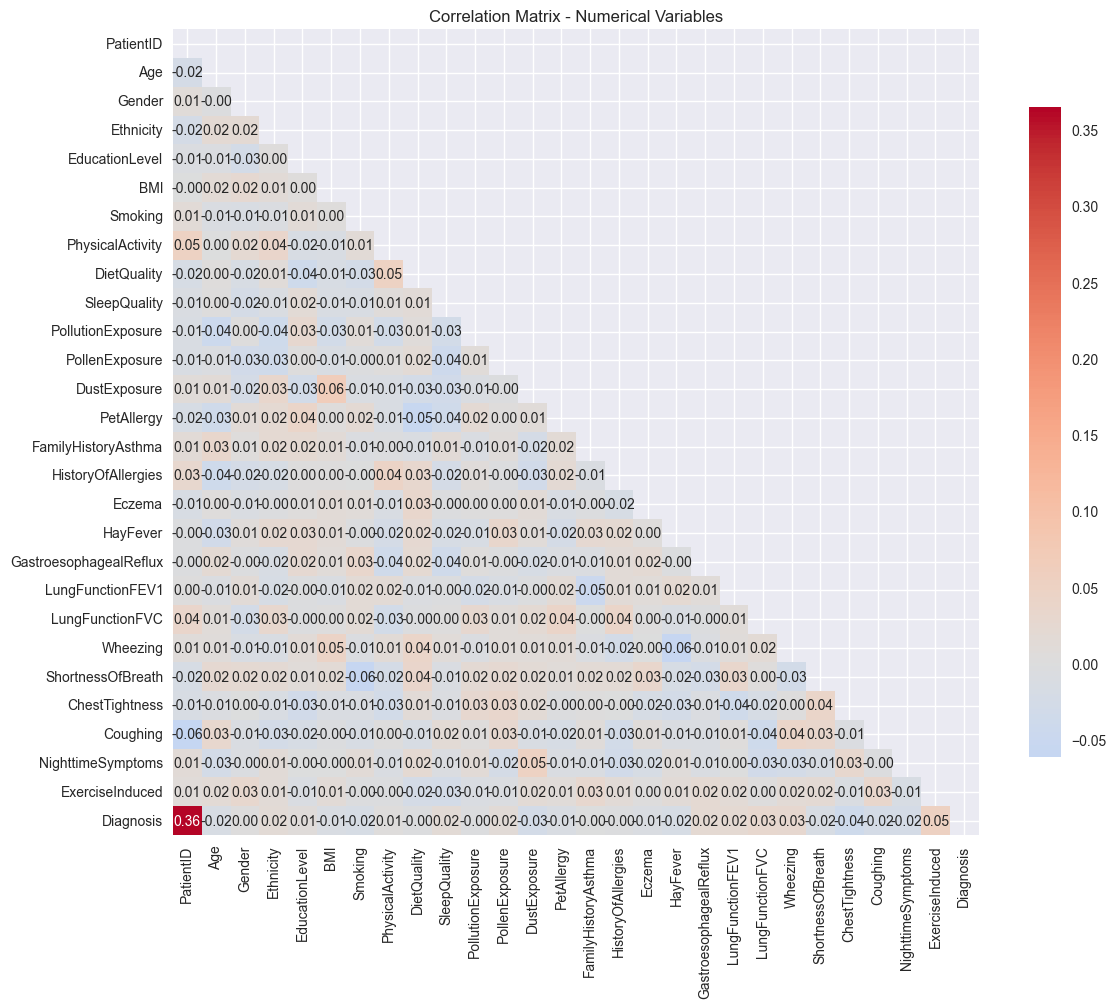

In [8]:
# =============================================================================
# 5. NUMERICAL VARIABLES ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("📊 NUMERICAL VARIABLES ANALYSIS")
print("="*60)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

if len(numerical_cols) > 0:
    # Descriptive statistics
    print("\n📈 Descriptive Statistics:")
    display(df[numerical_cols].describe().round(3))
    
    # Distribution plots for numerical variables
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Histogram with KDE
            df[col].hist(ax=axes[i], bins=30, alpha=0.7, density=True)
            df[col].plot.kde(ax=axes[i], secondary_y=False)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Density')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Correlation matrix
    if len(numerical_cols) > 1:
        print(f"\n🔗 Correlation Matrix:")
        correlation_matrix = df[numerical_cols].corr()
        
        plt.figure(figsize=(12, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, 
                   mask=mask,
                   annot=True, 
                   cmap='coolwarm', 
                   center=0,
                   square=True,
                   fmt='.2f',
                   cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix - Numerical Variables')
        plt.tight_layout()
        plt.show()
        
        # Find highly correlated pairs
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.7:  # High correlation threshold
                    high_corr_pairs.append((
                        correlation_matrix.columns[i], 
                        correlation_matrix.columns[j], 
                        corr_val
                    ))
        
        if high_corr_pairs:
            print(f"\n⚠️  High Correlations (|r| > 0.7):")
            for var1, var2, corr in high_corr_pairs:
                print(f"   {var1} ↔ {var2}: {corr:.3f}")


📝 CATEGORICAL VARIABLES ANALYSIS
Categorical columns (1): ['DoctorInCharge']

📌 Analysis of 'DoctorInCharge':
   Unique values: 1
   Most common: Dr_Confid (2392 occurrences)
   Value distribution:
     Dr_Confid: 2392 (100.0%)


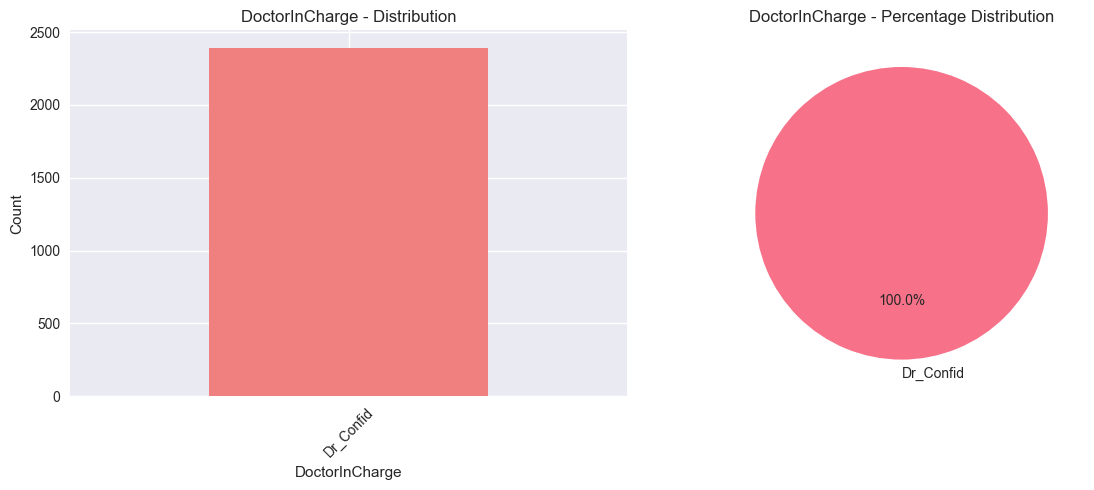

In [9]:
# =============================================================================
# 6. CATEGORICAL VARIABLES ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("📝 CATEGORICAL VARIABLES ANALYSIS")
print("="*60)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

for col in categorical_cols:
    print(f"\n📌 Analysis of '{col}':")
    value_counts = df[col].value_counts()
    unique_count = df[col].nunique()
    
    print(f"   Unique values: {unique_count}")
    print(f"   Most common: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
    
    if unique_count <= 10:
        print(f"   Value distribution:")
        for val, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"     {val}: {count} ({percentage:.1f}%)")
            
        # Visualize categorical distribution
        plt.figure(figsize=(12, 5))
        
        # Bar plot
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='lightcoral')
        plt.title(f'{col} - Distribution')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        # Pie chart
        plt.subplot(1, 2, 2)
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'{col} - Percentage Distribution')
        
        plt.tight_layout()
        plt.show()
    
    elif unique_count <= 50:
        print(f"   Top 10 values:")
        for val, count in value_counts.head(10).items():
            percentage = (count / len(df)) * 100
            print(f"     {val}: {count} ({percentage:.1f}%)")


🔍 OUTLIER DETECTION


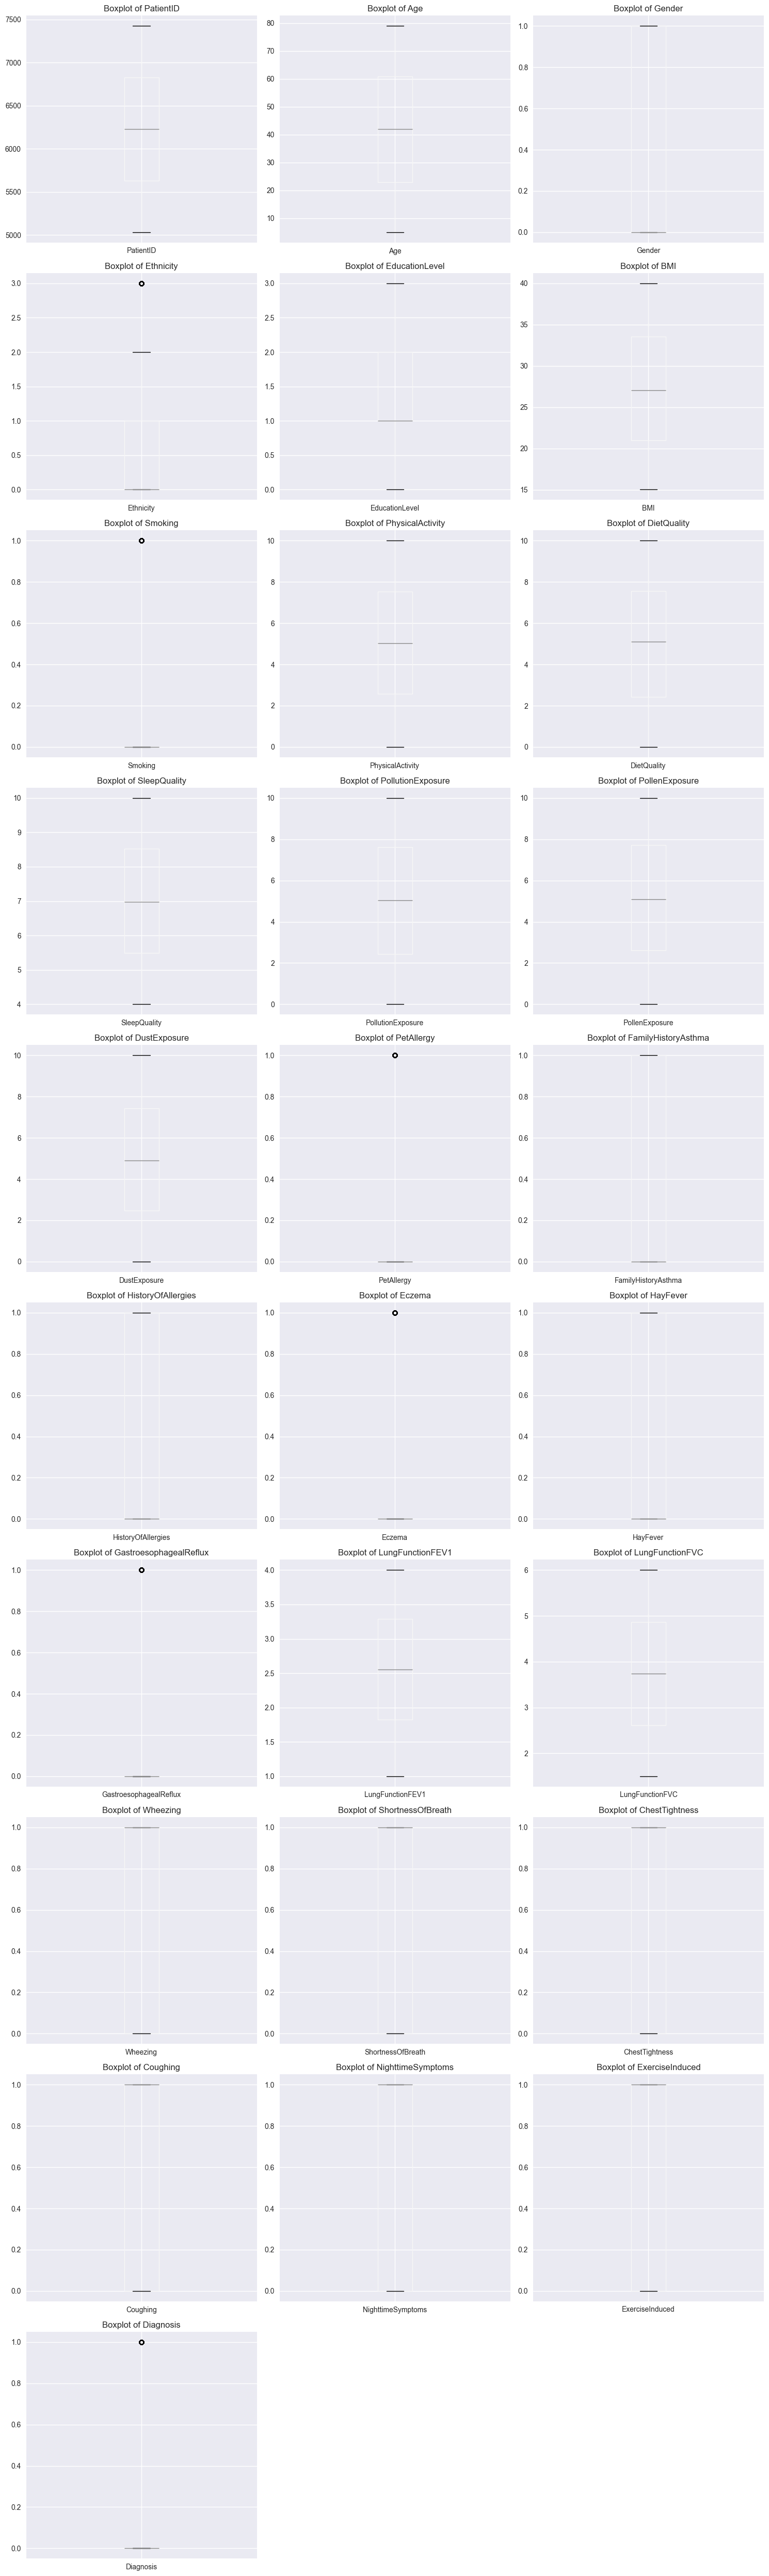


📊 Outlier Summary (IQR Method):
   PatientID: 0 outliers (0.0%)
   Age: 0 outliers (0.0%)
   Gender: 0 outliers (0.0%)
   Ethnicity: 223 outliers (9.3%)
     Range: [0.00, 3.00]
     Normal range: [-1.50, 2.50]
   EducationLevel: 0 outliers (0.0%)
   BMI: 0 outliers (0.0%)
   Smoking: 339 outliers (14.2%)
     Range: [0.00, 1.00]
     Normal range: [0.00, 0.00]
   PhysicalActivity: 0 outliers (0.0%)
   DietQuality: 0 outliers (0.0%)
   SleepQuality: 0 outliers (0.0%)
   PollutionExposure: 0 outliers (0.0%)
   PollenExposure: 0 outliers (0.0%)
   DustExposure: 0 outliers (0.0%)
   PetAllergy: 397 outliers (16.6%)
     Range: [0.00, 1.00]
     Normal range: [0.00, 0.00]
   FamilyHistoryAsthma: 0 outliers (0.0%)
   HistoryOfAllergies: 0 outliers (0.0%)
   Eczema: 459 outliers (19.2%)
     Range: [0.00, 1.00]
     Normal range: [0.00, 0.00]
   HayFever: 0 outliers (0.0%)
   GastroesophagealReflux: 378 outliers (15.8%)
     Range: [0.00, 1.00]
     Normal range: [0.00, 0.00]
   LungFunctio

In [10]:
# =============================================================================
# 7. OUTLIER DETECTION
# =============================================================================

print("\n" + "="*60)
print("🔍 OUTLIER DETECTION")
print("="*60)

if len(numerical_cols) > 0:
    # Box plots for outlier detection
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes.reshape(1, -1)
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot of {col}')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical outlier detection (IQR method)
    print(f"\n📊 Outlier Summary (IQR Method):")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        print(f"   {col}: {outlier_count} outliers ({outlier_percentage:.1f}%)")
        if outlier_count > 0:
            print(f"     Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
            print(f"     Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")


🔗 BIVARIATE ANALYSIS
🎯 Analyzing relationships with target variable: 'FamilyHistoryAsthma'

📊 Numerical Variables vs FamilyHistoryAsthma:


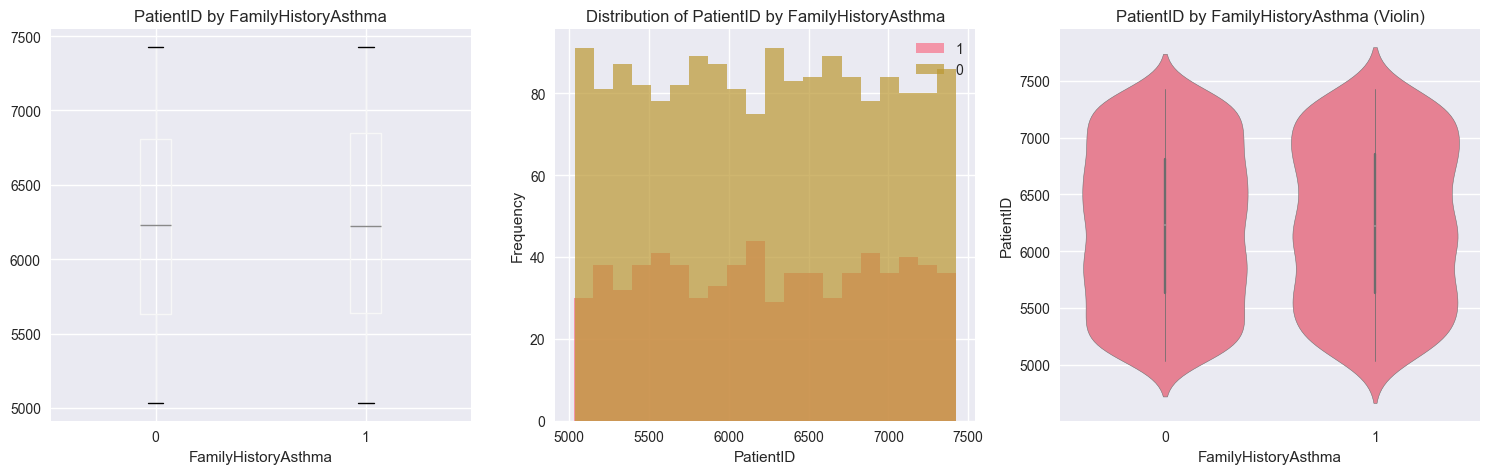

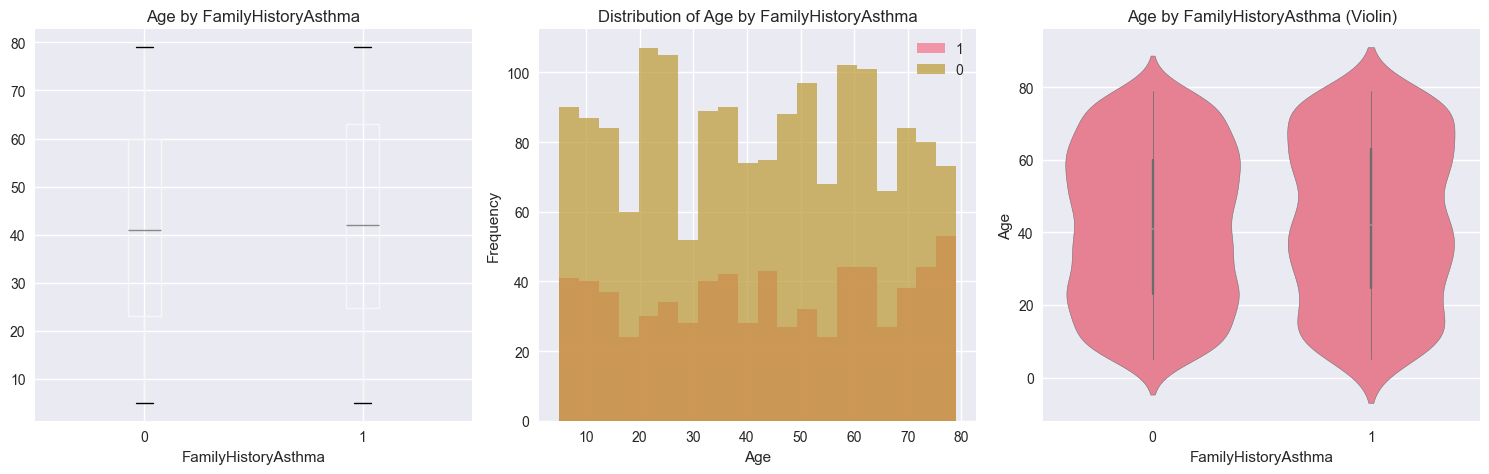

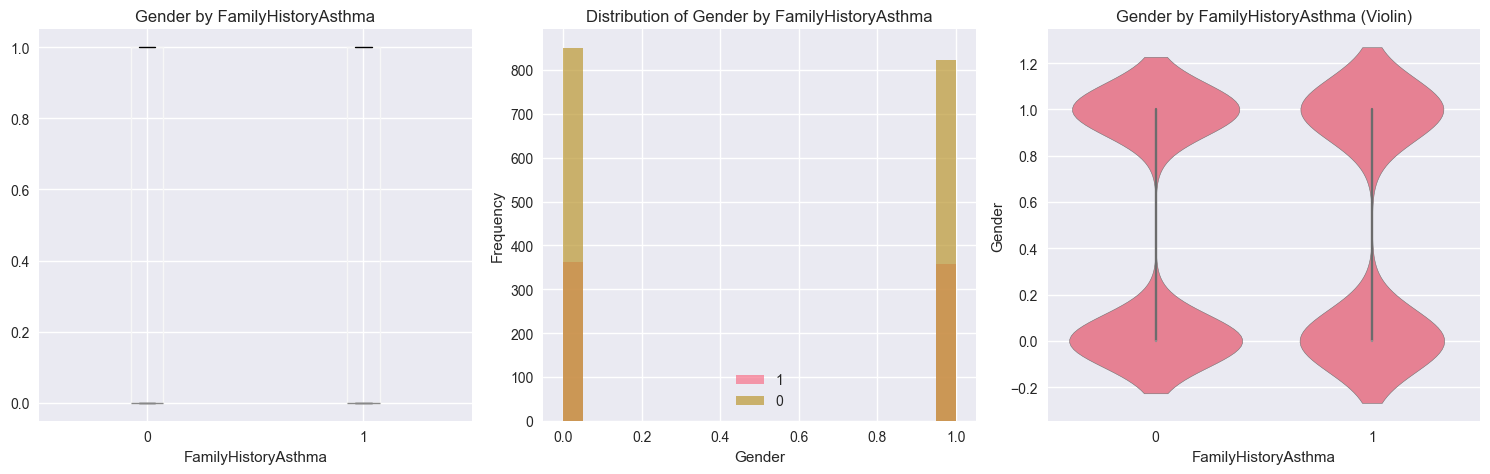

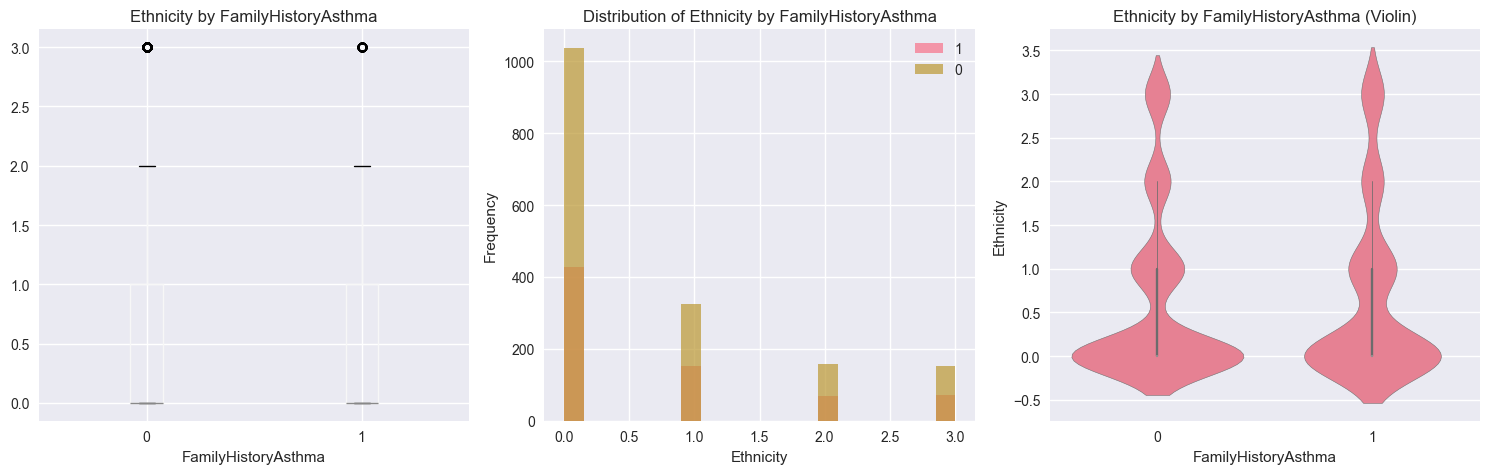


📝 Categorical Variables vs FamilyHistoryAsthma:

   Cross-tabulation: DoctorInCharge vs FamilyHistoryAsthma


FamilyHistoryAsthma,0,1
DoctorInCharge,,
Dr_Confid,1672,720



   Percentage distribution:


FamilyHistoryAsthma,0,1
DoctorInCharge,,
Dr_Confid,69.9,30.1


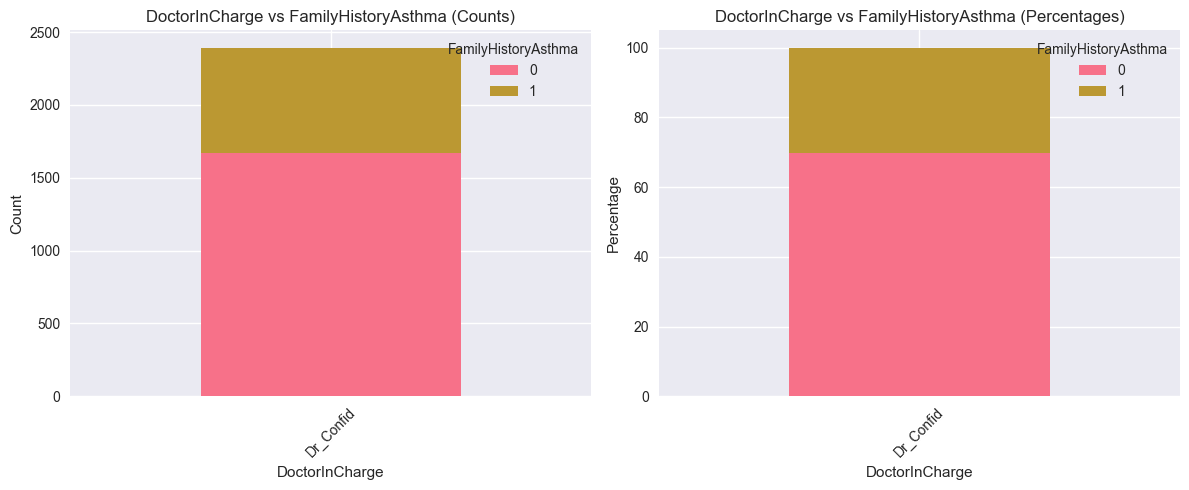

In [11]:
# =============================================================================
# 8. BIVARIATE ANALYSIS
# =============================================================================

print("\n" + "="*60)
print("🔗 BIVARIATE ANALYSIS")
print("="*60)

# If we have a target variable, analyze relationships
if target_candidates:
    main_target = target_candidates[0]  # Use the first candidate as main target
    print(f"🎯 Analyzing relationships with target variable: '{main_target}'")
    
    # Numerical vs Target
    if len(numerical_cols) > 0:
        print(f"\n📊 Numerical Variables vs {main_target}:")
        
        for col in numerical_cols[:4]:  # Limit to first 4 to avoid too many plots
            plt.figure(figsize=(15, 5))
            
            # Box plot
            plt.subplot(1, 3, 1)
            df.boxplot(column=col, by=main_target, ax=plt.gca())
            plt.title(f'{col} by {main_target}')
            plt.suptitle('')  # Remove automatic title
            
            # Histogram
            plt.subplot(1, 3, 2)
            for category in df[main_target].unique():
                subset = df[df[main_target] == category]
                plt.hist(subset[col], alpha=0.7, label=str(category), bins=20)
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.title(f'Distribution of {col} by {main_target}')
            plt.legend()
            
            # Violin plot
            plt.subplot(1, 3, 3)
            sns.violinplot(data=df, x=main_target, y=col)
            plt.title(f'{col} by {main_target} (Violin)')
            
            plt.tight_layout()
            plt.show()
    
    # Categorical vs Target
    categorical_features = [col for col in categorical_cols if col != main_target]
    if categorical_features:
        print(f"\n📝 Categorical Variables vs {main_target}:")
        
        for col in categorical_features[:4]:  # Limit to avoid too many plots
            # Cross-tabulation
            crosstab = pd.crosstab(df[col], df[main_target])
            print(f"\n   Cross-tabulation: {col} vs {main_target}")
            display(crosstab)
            
            # Percentage within each category
            crosstab_pct = pd.crosstab(df[col], df[main_target], normalize='index') * 100
            print(f"\n   Percentage distribution:")
            display(crosstab_pct.round(1))
            
            # Stacked bar plot
            plt.figure(figsize=(12, 5))
            
            plt.subplot(1, 2, 1)
            crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
            plt.title(f'{col} vs {main_target} (Counts)')
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            
            plt.subplot(1, 2, 2)
            crosstab_pct.plot(kind='bar', stacked=True, ax=plt.gca())
            plt.title(f'{col} vs {main_target} (Percentages)')
            plt.ylabel('Percentage')
            plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.show()

In [12]:
# =============================================================================
# 9. FEATURE INTERACTIONS
# =============================================================================

print("\n" + "="*60)
print("🔄 FEATURE INTERACTIONS")
print("="*60)

# Create interaction plots for top features
if len(numerical_cols) >= 2 and target_candidates:
    print(f"🔗 Exploring interactions between numerical features:")
    
    # Pairplot with target variable
    if len(numerical_cols) <= 6:  # Limit for readability
        plot_cols = numerical_cols + [main_target]
        sns.pairplot(df[plot_cols], hue=main_target, diag_kind='hist', plot_kws={'alpha':0.7})
        plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
        plt.show()
    
    # Correlation with target (if numerical)
    if main_target in numerical_cols:
        target_corr = df[numerical_cols].corr()[main_target].sort_values(key=abs, ascending=False)
        print(f"\n📊 Correlation with {main_target}:")
        for feature, corr in target_corr.items():
            if feature != main_target:
                print(f"   {feature}: {corr:.3f}")


🔄 FEATURE INTERACTIONS
🔗 Exploring interactions between numerical features:

📊 Correlation with FamilyHistoryAsthma:
   LungFunctionFEV1: -0.046
   Age: 0.032
   ExerciseInduced: 0.029
   HayFever: 0.026
   DustExposure: -0.023
   EducationLevel: 0.022
   Ethnicity: 0.020
   PetAllergy: 0.018
   ShortnessOfBreath: 0.018
   PatientID: 0.014
   BMI: 0.014
   SleepQuality: 0.013
   DietQuality: -0.011
   PollutionExposure: -0.010
   HistoryOfAllergies: -0.010
   NighttimeSymptoms: -0.009
   Coughing: 0.008
   Smoking: -0.008
   PollenExposure: 0.008
   GastroesophagealReflux: -0.007
   Wheezing: -0.006
   Gender: 0.005
   PhysicalActivity: -0.005
   ChestTightness: 0.003
   Eczema: -0.003
   Diagnosis: -0.001
   LungFunctionFVC: -0.000


In [13]:
# =============================================================================
# 10. SUMMARY AND INSIGHTS
# =============================================================================

print("\n" + "="*60)
print("📋 EDA SUMMARY AND KEY INSIGHTS")
print("="*60)

print(f"📊 Dataset Overview:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Total features: {len(df.columns)}")
print(f"   • Numerical features: {len(numerical_cols)}")
print(f"   • Categorical features: {len(categorical_cols)}")
print(f"   • Missing values: {df.isnull().sum().sum()}")
print(f"   • Duplicate rows: {df.duplicated().sum()}")

if target_candidates:
    print(f"\n🎯 Target Variable Insights:")
    for target in target_candidates[:2]:
        value_counts = df[target].value_counts()
        print(f"   • {target}: {len(value_counts)} classes")
        for val, count in value_counts.items():
            pct = (count / len(df)) * 100
            print(f"     - {val}: {count} ({pct:.1f}%)")

print(f"\n🔍 Data Quality Observations:")
if df.isnull().sum().sum() == 0:
    print(f"   • ✅ No missing values detected")
else:
    print(f"   • ❗ Missing values present - will need handling")

if df.duplicated().sum() == 0:
    print(f"   • ✅ No duplicate rows")
else:
    print(f"   • ❗ {df.duplicated().sum()} duplicate rows found")

print(f"\n💡 Next Steps Recommendations:")
print(f"   1. 🧹 Data Preprocessing:")
print(f"      - Handle any missing values")
print(f"      - Consider outlier treatment")
print(f"      - Encode categorical variables")
print(f"   2. 🛠️  Feature Engineering:")
print(f"      - Create interaction terms")
print(f"      - Consider feature scaling")
print(f"      - Feature selection based on correlation")
print(f"   3. 🎯 Modeling Strategy:")
print(f"      - Classification task (predicting asthma factors)")
print(f"      - Consider class balance")
print(f"      - Multiple algorithm comparison")

print(f"\n✅ EDA COMPLETED!")
print(f"Ready to proceed to data preprocessing and modeling.")
print("="*60)


📋 EDA SUMMARY AND KEY INSIGHTS
📊 Dataset Overview:
   • Total samples: 2,392
   • Total features: 29
   • Numerical features: 28
   • Categorical features: 1
   • Missing values: 0
   • Duplicate rows: 0

🎯 Target Variable Insights:
   • FamilyHistoryAsthma: 2 classes
     - 0: 1672 (69.9%)
     - 1: 720 (30.1%)
   • Diagnosis: 2 classes
     - 0: 2268 (94.8%)
     - 1: 124 (5.2%)

🔍 Data Quality Observations:
   • ✅ No missing values detected
   • ✅ No duplicate rows

💡 Next Steps Recommendations:
   1. 🧹 Data Preprocessing:
      - Handle any missing values
      - Consider outlier treatment
      - Encode categorical variables
   2. 🛠️  Feature Engineering:
      - Create interaction terms
      - Consider feature scaling
      - Feature selection based on correlation
   3. 🎯 Modeling Strategy:
      - Classification task (predicting asthma factors)
      - Consider class balance
      - Multiple algorithm comparison

✅ EDA COMPLETED!
Ready to proceed to data preprocessing and mode